# Проект по анализу данных

участник: Лхагвасурэн Анхзул

# Шаг 1: Выбор темы

Мне было интересно работать с продажами и прогнозировать прибыльность продукта, поэтому я решила для своего исследования проанализировать продажи кофейня.

# Шаг 2: Сбор данных

Для исследования я получила данные от Kaggle. Вот данные о продажах кофейни за 6 месяцев. Набор данных состоит из следующих столбцов: transaction_id- ID транзакции

transaction_date- Дата транзакции

transaction_time- Время транзакции

transaction_quantity- Количество

store_id- Номер кофейного магазина

store_location- Расположение кофейного магазина

product_id- Номер продукта

unit_price- Цена за единицу товара

product_category- Категория продукта

product_type-Тип продукта

product_detail-Информация о продукте

# Шаг 3: Предварительная обработка

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

from scipy import stats
import statistics

import random
from sklearn import preprocessing
import scipy.stats as sp
np.random.seed(42)
from scipy.stats import norm   
from scipy.stats import ttest_ind
from tqdm import tqdm
import math
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # подгрузили модель
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV    #Подгружаем Gridsearch, регрессии

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [195]:
df = pd.read_excel("Downloads\Data-Coffee Shop Sales.xlsx") 
df

,transaction_id,transaction_date,transaction_time,transaction_quantity,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transaction_id        149116 non-null  int64         
 1   transaction_date      149116 non-null  datetime64[ns]
 2   transaction_time      149116 non-null  object        
 3   transaction_quantity  149116 non-null  int64         
 4   store_id              149116 non-null  int64         
 5   store_location        149116 non-null  object        
 6   product_id            149116 non-null  int64         
 7   unit_price            149116 non-null  float64       
 8   product_category      149116 non-null  object        
 9   product_type          149116 non-null  object        
 10  product_detail        149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [197]:
df.isna().sum()

transaction_id          0
transaction_date        0
transaction_time        0
transaction_quantity    0
store_id                0
store_location          0
product_id              0
unit_price              0
product_category        0
product_type            0
product_detail          0
dtype: int64

Проанализировав информацию о данных, узнали, что все в норме. В выбранных мной данных нет пропуски.

In [198]:
df.describe(include = object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


Из приведенной выше информации мы узнали, что кофейня имеет 3 сеть и 9 видов 29 продуктов. Самый посещаемый сеть — «Hell's Kitchen», а самый покупаемый товар — Brewed Chai tea.

Не нужны ID транзакции, ID магазина и ID продукта для анализа, поэтому я удалила их. Также добавлен новый столбец месяца для анализа месяцев.

In [199]:
df.drop(columns = ["transaction_id", "store_id", "product_id"], inplace = True)

In [200]:
df['month'] = df['transaction_date'].dt.month
df

,transaction_date,transaction_time,transaction_quantity,store_location,unit_price,product_category,product_type,product_detail,month
0,2023-01-01,07:06:11,2,Lower Manhattan,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,1
1,2023-01-01,07:08:56,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1
2,2023-01-01,07:14:04,2,Lower Manhattan,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1
3,2023-01-01,07:20:24,1,Lower Manhattan,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1
4,2023-01-01,07:22:41,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1
...,...,...,...,...,...,...,...,...,...
149111,2023-06-30,20:18:41,2,Hell's Kitchen,2.50,Tea,Brewed herbal tea,Peppermint Rg,6
149112,2023-06-30,20:25:10,2,Hell's Kitchen,3.00,Tea,Brewed Black tea,English Breakfast Lg,6
149113,2023-06-30,20:31:34,1,Hell's Kitchen,3.00,Tea,Brewed herbal tea,Peppermint Lg,6
149114,2023-06-30,20:57:19,1,Hell's Kitchen,3.75,Coffee,Barista Espresso,Cappuccino,6


# Шаг 4. Визуализация

# 1. Популярный продукт

Что люди покупают больше всего? Какой продукт наиболее популярен? Давайте построим следующий график, чтобы ответить на эти вопросы

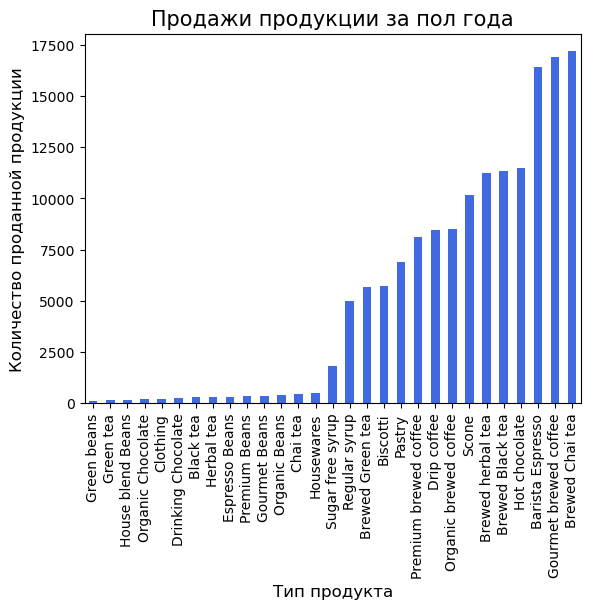

In [201]:
bar = df.groupby('product_type')['transaction_quantity'].count()
bar.sort_values().plot(kind='bar', color='royalblue')
plt.xlabel('Тип продукта', fontsize=12)
plt.ylabel('Количество проданной продукции', fontsize=12)
plt.title('Продажи продукции за пол года', fontsize=15)
plt.show()

Если посмотреть на график, то самым покупаемым продуктом является Brewed Chai tea. Наименее покупаемый продукт —Green beans . Также больше всего продается кофейная и чайная продукция.

# 2. Объем продаж

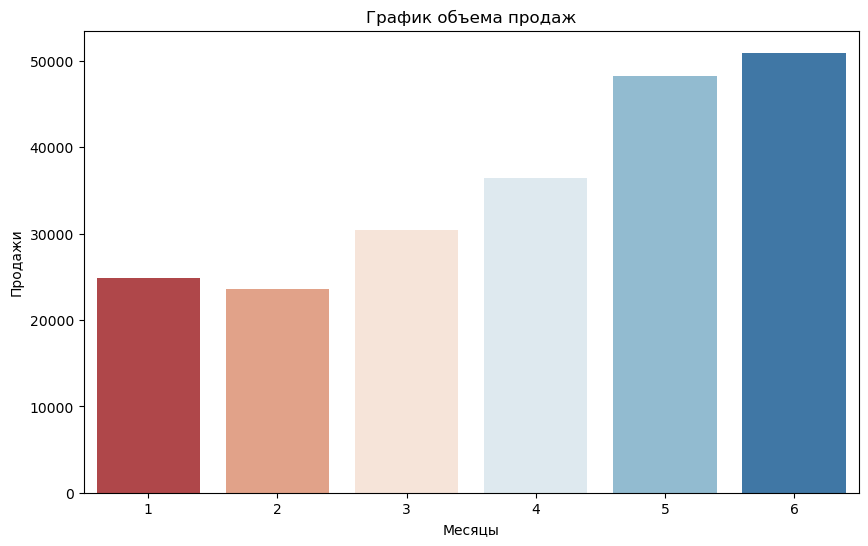

In [202]:
bar = df.groupby('month')['transaction_quantity'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=bar.index, y=bar.values, color='skyblue', palette = "RdBu")
plt.xlabel('Месяцы')
plt.ylabel('Продажи')
plt.title('График объема продаж')
plt.show()

Как видите, известно, что продажи продукции стабильно росли с февраля по июнь. Поскольку погода становится теплее и на улице становится жарче, можно с уверенностью предположить, что люди будут посещать больше кафе.

# 3. Продукт-сотоварищи

Большую часть времени люди в кофейнях покупают один продукт, тогда как в нашем наборе данных есть продукты, купленные вместе. Это можно определить во время транзакции заказа, давайте вместе посмотрим два наиболее часто покупаемых продукта.

In [203]:
table = pd.pivot_table(df, index = 'transaction_time', values = 'transaction_quantity', 
                       columns = 'product_type', aggfunc = np.sum)
table = table.fillna(0)
table[table !=0] = 1
Rcorr = table.corr()-np.eye(29)
twoproduct = Rcorr.max().values.max()
twoproduct

0.5062062594663386

In [204]:
table.corr()[table.corr()==twoproduct].stack().index.tolist()[0]

('Barista Espresso', 'Regular syrup')

Давайте создадим тепловую карту и посмотрим, как все продукты сочетаются друг с другом.

<Axes: xlabel='product_type', ylabel='product_type'>

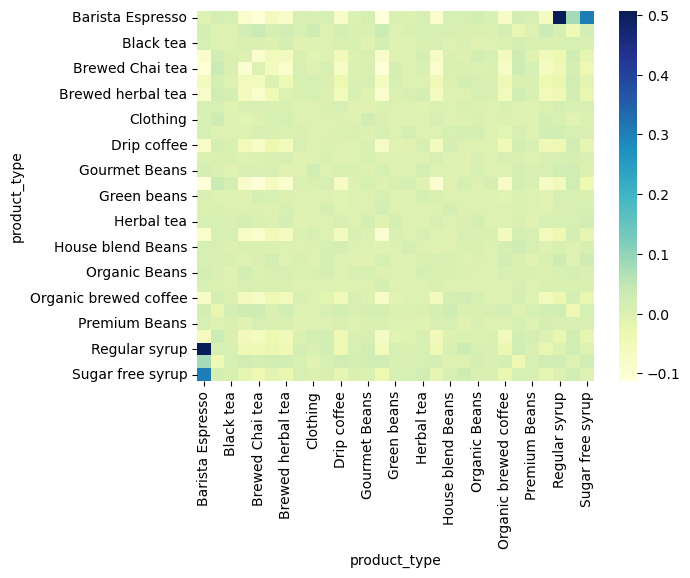

In [205]:
sns.heatmap(data=Rcorr, cmap="YlGnBu")

Люди обычно покупают кофе эспрессо с двумя видами сиропа.

# 4. Сеть кафе

В наших данных есть 3 сеть кафе. Давайте посмотрим, какой сеть приносит больше всего доходов.

In [206]:
df['income']=df['transaction_quantity']*df['unit_price']
df.groupby('store_location')['income'].sum()

store_location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: income, dtype: float64

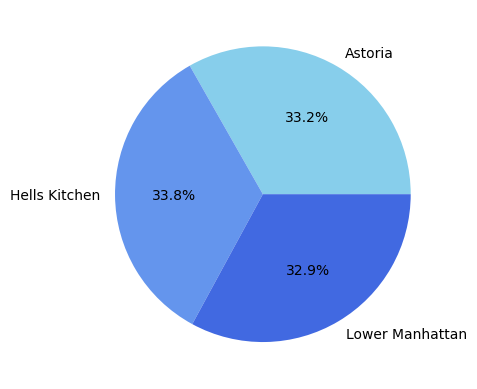

In [207]:
plt.pie(df.groupby('store_location')['income'].sum(), 
        labels =['Astoria', 'Hells Kitchen', 'Lower Manhattan'], 
        autopct='%1.1f%%', colors=['skyblue', 'cornflowerblue', 'royalblue'])
plt.show()

# 5. Время

Давайте добавим столбец времени, чтобы увидеть, в какое время в кофейне больше всего транзакцей.

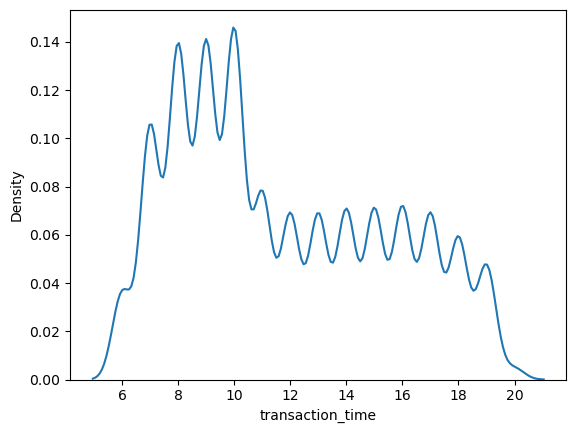

In [208]:
time = df["transaction_time"].apply(lambda x : x.hour)
sns.kdeplot(data=time)
plt.title('')
plt.show()

Это означает, что большая часть транзакций происходит с 8 до 11 утра. Зная эту информацию, может возникнуть необходимость найма дополнительных сотрудников на неполный рабочий день в утренние часы.

# 6.Популярный категория продукта

In [209]:
category_count = df['product_category'].value_counts()
iplot(px.bar(x=category_count.index, y=category_count.values,
             labels={'x': 'Product Category', 'y': 'Count'},
             title='Количество категорий'))

Видимо, что кофе является самым продаваемым продуктом. Кроме того, чай демонстрирует высокий уровень продаж.

# Шаг 5. Создание новых признаков

# 1. Выручка от продажи

В нашей таблице отсутствует одна важная характеристика — выручка от продажи продукции. Считаем и добавляем новый столбец.

In [210]:
df['income']=df['transaction_quantity']*df['unit_price']

In [211]:
df.groupby('month')['income'].sum()

month
1     81677.74
2     76145.19
3     98834.68
4    118941.08
5    156727.76
6    166485.88
Name: income, dtype: float64

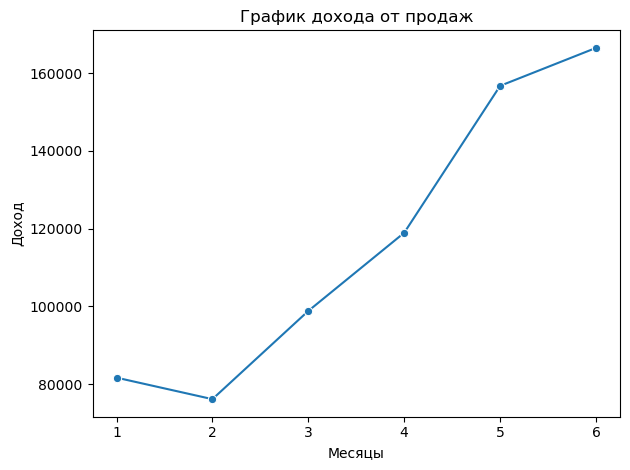

In [212]:
monthly_income  = df.groupby("month")["income"].sum().reset_index().sort_values(by = "income")
sns.lineplot(x = "month", y = "income", data = monthly_income , marker = "o")
plt.xlabel('Месяцы')
plt.ylabel('Доход')
plt.title('График дохода от продаж')
plt.tight_layout()
plt.show()

Поскольку я хочу спрогнозировать выручку на следующий месяц, нам нужно было посмотреть, что произошло с выручкой в течение полгода.

Text(0.5, 1.0, 'График дохода от продаж')

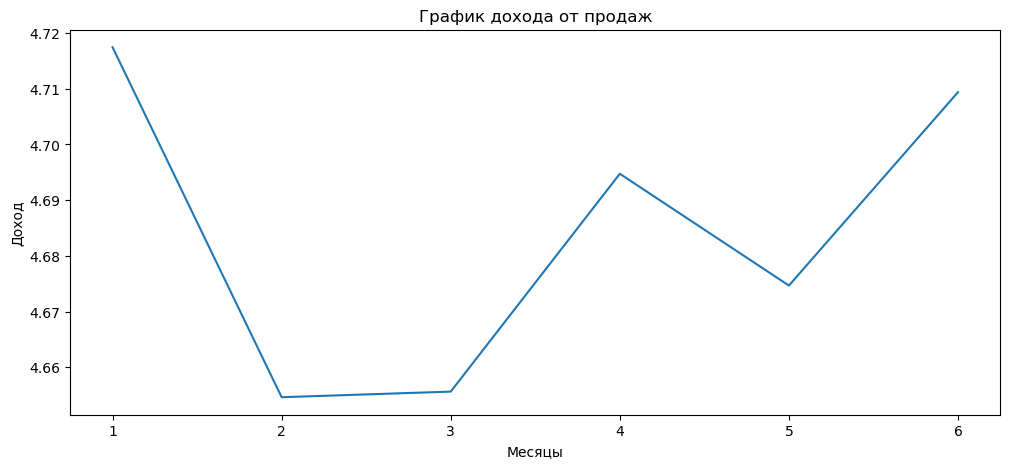

In [213]:
graf_2=df.groupby('month')['income'].mean()
graf_2.plot(figsize=(12, 5))
plt.ticklabel_format(style='plain')
plt.xlabel('Месяцы')
plt.ylabel('Доход')
plt.title('График дохода от продаж')

# 2. День

Добавив столбец «День», вы сможете увидеть, в какой день недели наблюдаются самые высокие продажи.

In [214]:
df["day"] = df["transaction_date"].dt.day_name()

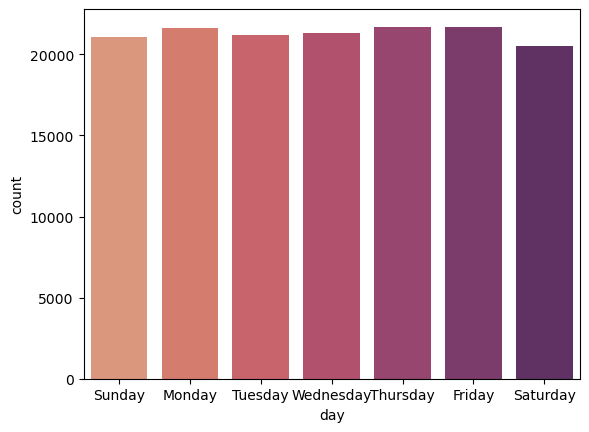

In [215]:
sns.countplot(data=df,x ='day',palette='flare')
plt.show()

В понедельник, четверг и пятницу продажи немного выше.

# Шаг 6. Гипотезы

Проверяем гипотезу о том, что средняя доходность в каждом месяце больше 4.66

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 4.66 \hspace{2mm} \ \\
&H_1: \hspace{2mm} \mu > 4.66  \hspace{2mm} \
\end{aligned}
$$

In [216]:
#Правосторонняя альтернативная гипотеза, матожидание и дисперсия неизвестно, выборки большие используем Z статистику
alpha95 = 0.05                            
z_crit95 = stats.norm.ppf(1 - alpha95)
for i in range(1,13):
    m=df.loc[df['month']==i]['income']
    z_p=((m.mean()-4.66)*np.sqrt(len(m)))/np.sqrt(statistics.variance(m))
    if z_p< z_crit95:
        print("Ho не отвергается ")
    else:
        print("Ho отвергается ")

Ho не отвергается 
Ho не отвергается 
Ho не отвергается 
Ho не отвергается 
Ho не отвергается 
Ho отвергается 


StatisticsError: variance requires at least two data points

Проверяем гипотезу о том, что средняя доходность в каждом месяце равно 4.70 .

In [217]:
#Двухсторонняя альтернативная гипотеза, матожидание и дисперсия неизвестно, выборки большие, используем Z статистику
alpha95 = 0.05                                
z_crit95 = stats.norm.ppf(1 - alpha95/2)
for i in range(1,13):
    m = df.loc[df['month']==i]['income']
    z_p = ((m.mean()-4.70)*np.sqrt(len(m)))/np.sqrt(statistics.variance(m))
    if z_p > -z_crit95 and z_p< z_crit95:
        print("Ho не отвергается ")
    else:
        print("Ho отвергается ")

Ho не отвергается 
Ho не отвергается 
Ho отвергается 
Ho не отвергается 
Ho не отвергается 
Ho не отвергается 


StatisticsError: variance requires at least two data points

Для оценки предположения о превосходстве продаж одного типа продуктов над другими, возможно применение t-теста для сопоставления средних объемов продаж различных товаров. Допустим, сравнить объемы продаж между такими видами продуктов, как "Barista Espresso" и "Chai tea".

In [218]:
coffee = df[df['product_type'] == 'Barista Espresso']['transaction_quantity']
tea = df[df['product_type'] == 'Chai tea']['transaction_quantity']
# Проверяем гипотизу
t_stat, p_value = ttest_ind(coffee, tea)

# Результаты теста
print("t-статистика:", t_stat)
print("p-значение:", p_value)
if p_value < 0.05:
    print("Результат статистически значим: продажи различаются между типами продуктов")
else:
    print("Результат статистически незначим: продажи не различаются между типами продуктов")

t-статистика: 19.682469862553887
p-значение: 2.765149700799284e-85
Результат статистически значим: продажи различаются между типами продуктов


In [219]:
drinking_chocolate = df[df['product_type'] == 'Hot chocolate']['transaction_quantity']
bakery = df[df['product_type'] == 'Scone']['transaction_quantity']
# Проверяем гипотезу 
t_stat, p_value = ttest_ind(drinking_chocolate, bakery )

# Результаты теста
print("t-статистика:", t_stat)
print("p-значение:", p_value)
if p_value < 0.05:
    print("Результат статистически значим: продажи различаются между типами продуктов")
else:
    print("Результат статистически незначим: продажи не различаются между типами продуктов")

t-статистика: 87.66822766432162
p-значение: 0.0
Результат статистически значим: продажи различаются между типами продуктов


In [220]:
# Выбираем продажи Barista Espresso и Green tea
coffee = df[df['product_type'] == 'Barista Espresso']['transaction_quantity']
syrup = df[df['product_type'] == 'Regular syrup']['transaction_quantity']
# Проверяем гипотизу
t_stat, p_value = ttest_ind(coffee, syrup )

# Результаты теста
print("t-статистика:", t_stat)
print("p-значение:", p_value)
if p_value < 0.05:
    print("Результат статистически значим: продажи различаются между типами продуктов")
else:
    print("Результат статистически незначим: продажи не различаются между типами продуктов")

t-статистика: -0.7825117210532692
p-значение: 0.4339225662845737
Результат статистически незначим: продажи не различаются между типами продуктов


Проверим гипотезу о том, что продажи в разных сетях не отличаются друг от друга.

In [221]:
store1 = df[df['store_location'] == 'Astoria']['income']
store2 = df[df['store_location'] == "Hell's Kitchen"]['income']
# тестирование гипотезы
t_statistic, p_value = ttest_ind(store1, store2)

# Результат
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: продажи в городах отличаются друг от друга")
else:
    print("Не отвергаем нулевую гипотезу: продажи в городах не отличаются друг от друга")

Отвергаем нулевую гипотезу: продажи в городах отличаются друг от друга


In [222]:
store2 = df[df['store_location'] == "Hell's Kitchen"]['income']
store3 = df[df['store_location'] == 'Lower Manhattan']['income']
# тестирование гипотезы
t_statistic, p_value = ttest_ind(store2, store3)

# вывод результатов
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: продажи в городах отличаются друг от друга")
else:
    print("Не отвергаем нулевую гипотезу: продажи в городах не отличаются друг от друга")

Отвергаем нулевую гипотезу: продажи в городах отличаются друг от друга


# Шаг 7. Машинное обучение

In [223]:
income_table = pd.pivot_table(df, index=["product_type"], values=["income"], columns=['month'], aggfunc=np.sum)
income_table

income                                          \
month                         1         2         3         4         5   
product_type                                                              
Barista Espresso       10461.20  10027.15  13078.20  15555.90  20423.75   
Biscotti                2311.02   2240.88   2928.20   3232.07   4418.02   
Black tea                375.90    340.10    411.70    420.65    537.00   
Brewed Black tea        5535.50   5369.50   6875.00   8023.50  10778.00   
Brewed Chai tea         8761.45   8383.40  11029.65  13291.95  17427.35   
Brewed Green tea        2883.50   2754.50   3325.00   3991.50   5404.50   
Brewed herbal tea       5441.50   5226.00   6681.00   8050.00  10930.00   
Chai tea                 383.90    467.25    564.85    738.70    961.90   
Clothing                1008.00    476.00    807.00    896.00   1418.00   
Drinking Chocolate       316.74    276.22    375.40    554.03    593.49   
Drip coffee             3583.50   3363.50   4560.50   5415.50   7290.50   
Espresso Beans           806.25    674.50    857.20    783.45   1209.20   
Gourmet Beans            666.00    837.00   1023.00   1119.00   1653.00   
Gourmet brewed coffee   8072.10   7651.70   9789.10  11820.50  15559.20   
Green beans              230.00    170.00    190.00    210.00    290.00   
Green tea                185.00    157.25    249.75    231.25    314.50   
Herbal tea               349.05    313.25    420.65    438.55    581.75   
Hot chocolate           8337.75   8132.25  10253.50  12266.75  16319.75   
House blend Beans        486.00    288.00    378.00    594.00    738.00   
Housewares               882.00    759.00    994.00   1483.00   1471.00   
Organic Beans           1076.00    847.00   1277.00   1486.50   1757.50   
Organic Chocolate        205.20    174.80    212.80    319.20    387.60   
Organic brewed coffee   4609.10   4077.50   5323.70   6611.00   8350.20   
Pastry                  2875.58   2815.16   3724.59   4362.40   5842.22   
Premium Beans           1981.00   1261.00   1531.00   2631.75   3121.25   
Premium brewed coffee   4530.95   4149.10   5552.10   6568.30   8739.20   
Regular syrup            721.60    669.60    861.60   1033.60   1368.00   
Scone                   4349.15   3982.78   5249.79   6427.23   8305.28   
Sugar free syrup         252.80    260.80    310.40    384.80    537.60   

                                 
month                         6  
product_type                     
Barista Espresso       21860.00  
Biscotti                4663.34  
Black tea                626.50  
Brewed Black tea       11350.50  
Brewed Chai tea        18188.15  
Brewed Green tea        5493.50  
Brewed herbal tea      11211.00  
Chai tea                1184.65  
Clothing                1558.00  
Drinking Chocolate       612.16  
Drip coffee             7770.50  
Espresso Beans          1229.65  
Gourmet Beans           1500.00  
Gourmet brewed coffee  17142.00  
Green beans              250.00  
Green tea                333.00  
Herbal tea               626.50  
Hot chocolate          17106.00  
House blend Beans        810.00  
Housewares              1855.00  
Organic Beans           2065.50  
Organic Chocolate        380.00  
Organic brewed coffee   8775.00  
Pastry                  6036.04  
Premium Beans           4057.50  
Premium brewed coffee   9241.50  
Regular syrup           1430.40  
Scone                   8551.89  
Sugar free syrup         577.60

In [224]:
df_train, df_test = train_test_split(income_table, test_size=0.2, random_state=20)

In [225]:
df_train[('income',6)]

product_type
House blend Beans          810.00
Scone                     8551.89
Premium Beans             4057.50
Pastry                    6036.04
Organic Chocolate          380.00
Brewed Green tea          5493.50
Premium brewed coffee     9241.50
Housewares                1855.00
Green beans                250.00
Hot chocolate            17106.00
Brewed herbal tea        11211.00
Herbal tea                 626.50
Clothing                  1558.00
Barista Espresso         21860.00
Black tea                  626.50
Chai tea                  1184.65
Organic brewed coffee     8775.00
Espresso Beans            1229.65
Organic Beans             2065.50
Drinking Chocolate         612.16
Green tea                  333.00
Regular syrup             1430.40
Brewed Black tea         11350.50
Name: (income, 6), dtype: float64

In [226]:
y_train = df_train[('income', 6)]  # колонка 6. Целевые метки на трейне 
X_train = df_train.drop(('income', 6), axis=1) # все колонки кроме 6-a. Признаки на трейне.

y_test = df_test[('income', 6)]   # колонка 6. Целевые метки на тесте
X_test = df_test.drop(('income', 6), axis=1)   # все колонки кроме 6-a. Признаки на тесте.

In [227]:
y_train

product_type
House blend Beans          810.00
Scone                     8551.89
Premium Beans             4057.50
Pastry                    6036.04
Organic Chocolate          380.00
Brewed Green tea          5493.50
Premium brewed coffee     9241.50
Housewares                1855.00
Green beans                250.00
Hot chocolate            17106.00
Brewed herbal tea        11211.00
Herbal tea                 626.50
Clothing                  1558.00
Barista Espresso         21860.00
Black tea                  626.50
Chai tea                  1184.65
Organic brewed coffee     8775.00
Espresso Beans            1229.65
Organic Beans             2065.50
Drinking Chocolate         612.16
Green tea                  333.00
Regular syrup             1430.40
Brewed Black tea         11350.50
Name: (income, 6), dtype: float64

In [228]:
X_test

income                                       
month                        1        2         3         4         5
product_type                                                         
Gourmet brewed coffee  8072.10  7651.70   9789.10  11820.50  15559.20
Brewed Chai tea        8761.45  8383.40  11029.65  13291.95  17427.35
Biscotti               2311.02  2240.88   2928.20   3232.07   4418.02
Drip coffee            3583.50  3363.50   4560.50   5415.50   7290.50
Sugar free syrup        252.80   260.80    310.40    384.80    537.60
Gourmet Beans           666.00   837.00   1023.00   1119.00   1653.00

In [229]:
# LinearRegression- т.е. подгрузили экземпляр нашей модели
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
model.fit(X_train,y_train)    # обучили модель с дефолтными параметрами

LinearRegression()

In [230]:
model.coef_   

array([ 0.30771357, -0.35831062, -0.20814677,  0.74094659,  0.6443773 ])

In [231]:
model.intercept_

-19.723156589457176

Вывод: Наблюдаем зависимость между выручками каждого продукта периода с января до мае и выручками для каждого продукта за июня. Согласно модели с дефолтными параметрами: Если выручка каждого продукта за февраль растет на 1000 долларов, то выручка каждого продукта за июнь уменьшается на 358 долларов. Если выручка каждого продукта за мае растет на 1000 долларов, то выручка каждого продукта за июнь увеличивается на 644.3 долларов.

In [232]:
y_test_pred = model.predict(X_test)
y_test_pred          # получаем предсказания

array([16469.27110993, 18455.06041865,  4520.64563488,  7638.96628102,
         531.54415208,  1566.6488612 ])

In [233]:
y_train_pred = model.predict(X_train)
y_train_pred

array([  863.62542298,  8912.73817809,  3780.60386607,  6078.06809066,
         422.76413234,  5628.53974966,  9230.29496757,  1819.52736369,
         293.058474  , 17102.89426521, 11399.20431953,   587.69514657,
        1529.53698049, 21571.00259048,   546.10070111,   980.57951535,
        9108.51419296,  1167.9426238 ,  1975.99433616,   693.569306  ,
         302.87541322,  1430.40945108, 11218.75091299])

In [234]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Test MSE = %.4f" % mean_squared_error(y_test, y_test_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))  

Test MSE = 94671.8907
Train MSE = 24006.3337


In [235]:
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_test_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

Test MAE = 221.0954
Train MAE = 111.3479


In [236]:
print("Test MAPE = %.4f" % mean_absolute_percentage_error(y_test, y_test_pred))
print("Train MAPE = %.4f" % mean_absolute_percentage_error(y_train, y_train_pred))

Test MAPE = 0.0376
Train MAPE = 0.0561


Вывод:Получается, что наша модель дает большую ошибку. Тогда можем сказать, что наша модель имеет плохое качество. У нас MSE, MAE на тесте значительно больше, чем на трейне. Скорее всего модель переобучилась. Поэтому добавим регуляризацию и отнормируем данные.

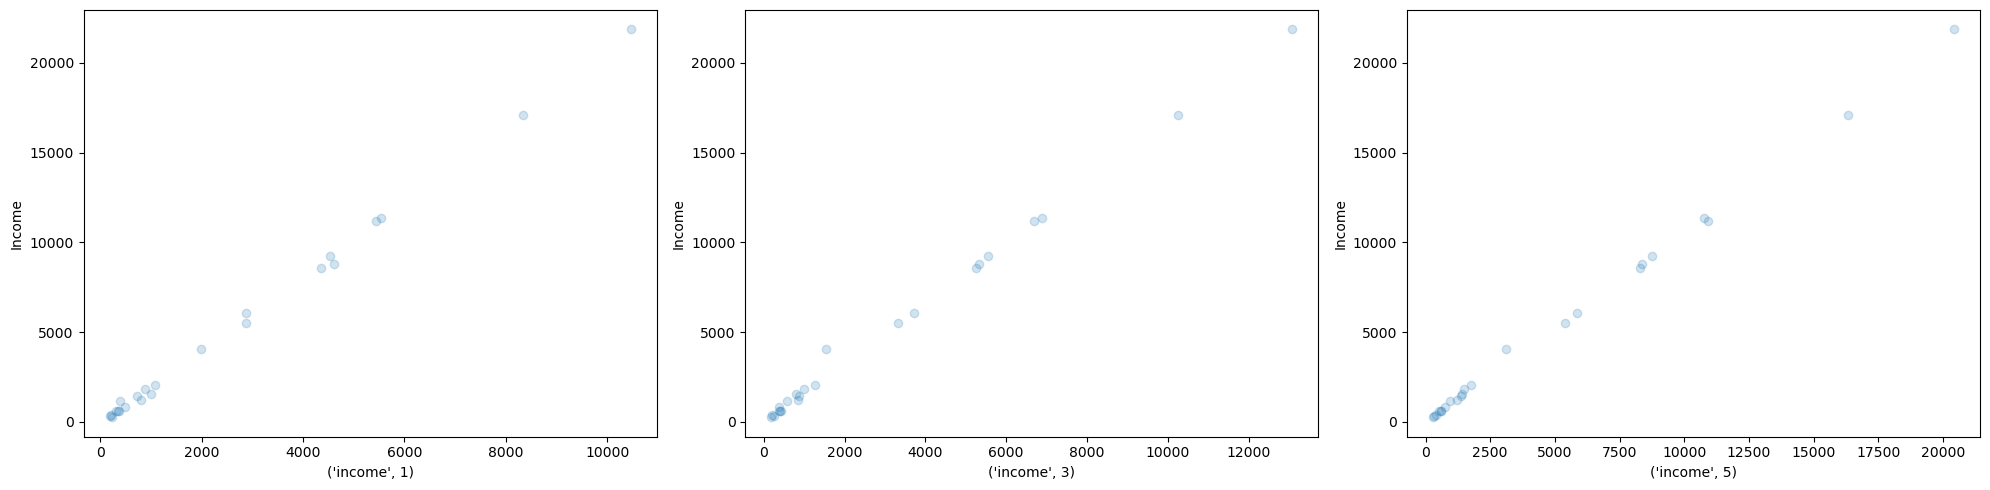

In [237]:
fig, axs = plt.subplots(figsize=(20, 5), ncols=3)
for i, feature in enumerate([ ('income', 1),('income', 3), ('income', 5)]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Income")
plt.tight_layout()    

Если посмотреть на облака рассеивания, видно, что между выручками для каждого продукта январь, март, мая и выручками для каждого товара за июль есть линейная связь.

Нормировка данных

In [238]:
scaler = StandardScaler()   

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [239]:
X_train_scaled

array([[-0.73023732, -0.75104461, -0.75423156, -0.73370875, -0.73397423],
       [ 0.65459514,  0.61317924,  0.64267367,  0.67223495,  0.64159337],
       [-0.19432116, -0.39178376, -0.42362788, -0.24256375, -0.300751  ],
       [ 0.12636104,  0.18205884,  0.20534779,  0.17456304,  0.19386241],
       [-0.83089636, -0.79284145, -0.80159993, -0.79994192, -0.79766936],
       [ 0.12920014,  0.15966134,  0.09077196,  0.08516753,  0.1142944 ],
       [ 0.71976541,  0.67458959,  0.72935606,  0.70623609,  0.72047063],
       [-0.58828227, -0.57713725, -0.57760375, -0.51943913, -0.60073071],
       [-0.82200624, -0.79461376, -0.80813746, -0.82626165, -0.81541093],
       [ 2.08439795,  2.14528831,  2.07740478,  2.07969468,  2.09845043],
       [ 1.04617241,  1.07221344,  1.05304948,  1.06336015,  1.11871062],
       [-0.77933011, -0.74172155, -0.74200238, -0.7711758 , -0.7623771 ],
       [-0.54311476, -0.68162936, -0.63122291, -0.66091975, -0.61036496],
       [ 2.84559607,  2.84494236,  2.8

In [240]:
y_train

product_type
House blend Beans          810.00
Scone                     8551.89
Premium Beans             4057.50
Pastry                    6036.04
Organic Chocolate          380.00
Brewed Green tea          5493.50
Premium brewed coffee     9241.50
Housewares                1855.00
Green beans                250.00
Hot chocolate            17106.00
Brewed herbal tea        11211.00
Herbal tea                 626.50
Clothing                  1558.00
Barista Espresso         21860.00
Black tea                  626.50
Chai tea                  1184.65
Organic brewed coffee     8775.00
Espresso Beans            1229.65
Organic Beans             2065.50
Drinking Chocolate         612.16
Green tea                  333.00
Regular syrup             1430.40
Brewed Black tea         11350.50
Name: (income, 6), dtype: float64

In [241]:
model_ridge = Ridge()   #подгрузили экземпляр модели
model_ridge.fit(X_train_scaled, y_train)
model_ridge

Ridge()

In [242]:
y_test_predr = model_ridge.predict(X_test_scaled)
y_test_predr  

array([16348.32970166, 18144.26784397,  4728.37757807,  7473.07777018,
         592.62187353,  1669.78650377])

In [243]:
y_train_predr = model_ridge.predict(X_train_scaled)
y_train_predr 

array([  828.97081947,  8772.89960191,  3317.26565802,  6077.33604087,
         456.99251404,  5732.58604649,  9143.80901663,  1791.66824074,
         406.3165476 , 17087.90276731, 11208.78312568,   714.21647206,
        1494.34490015, 21458.55241723,   719.02830499,  1002.66694956,
        9009.18204989,  1423.57843946,  2059.67436457,   707.78290563,
         411.57787033,  1492.83050718, 11326.32444019])

In [244]:
print("Test MSE = %.4f" % mean_squared_error(y_test, y_test_predr))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_predr))

Test MSE = 125596.8615
Train MSE = 44658.1905


In [245]:
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_test_predr))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_predr))

Test MAE = 230.8034
Train MAE = 139.0137


In [246]:
print("Test MAPE = %.4f" % mean_absolute_percentage_error(y_test, y_test_predr))
print("Train MAPE = %.4f" % mean_absolute_percentage_error(y_train, y_train_predr))   

Test MAPE = 0.0400
Train MAPE = 0.0992


Модель немного усложнили. MAPE данных на тесте и трейне раньше было 0.0376 и 0.0561 соответственно. Это говорит о переобучении модели. Надо, чтобы разница ошибок на трейне и тесте по возможности были ближе друг к другу. Чтобы модель более качественно получилась, подберем параметры по сетке.

In [247]:
parameters = {'solver' :['sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag', 'saga']}   
grid = GridSearchCV(model_ridge, parameters, scoring= 'neg_root_mean_squared_error')
grid.fit(X_train_scaled,y_train)
print('Комбинация параметров, которая лучше всего даст neg_root_mean_squared_error: : ')
print(grid.best_params_)
print('Наилучшая neg_root_mean_squared_error, полученная после перебора параметров с помощью поиска по сетке : ', 
      grid.best_score_)

Комбинация параметров, которая лучше всего даст neg_root_mean_squared_error: : 
{'solver': 'sag'}
Наилучшая neg_root_mean_squared_error, полученная после перебора параметров с помощью поиска по сетке :  -225.95137986934537


In [248]:
model_r1 = Ridge(solver='saga')

Проверяем результаты подбора параметров

In [249]:
model_ridgep = Ridge(solver='saga', alpha=0)
model_ridgep

Ridge(alpha=0, solver='saga')

In [250]:
model_ridgep.fit(X_train_scaled,y_train) 
y_pred_test_ridgep = model_ridgep.predict(X_test_scaled)
y_pred_train_ridgep = model_ridgep.predict(X_train_scaled)

In [251]:
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred_test_ridgep))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_pred_train_ridgep))  

Test MSE = 90235.1605
Train MSE = 31436.0739


In [252]:
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred_test_ridgep))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_pred_train_ridgep))

Test MAE = 194.5045
Train MAE = 110.7230


In [253]:
print("Test MAPE = %.4f" % mean_absolute_percentage_error(y_test, y_pred_test_ridgep))
print("Train MAPE = %.4f" % mean_absolute_percentage_error(y_train, y_pred_train_ridgep))  

Test MAPE = 0.0366
Train MAPE = 0.0516


Вывод: Я делала обучить модель, которая делает MAPE на тесте и на трейне как можно ближе друг к другу и при этом чтобы она была меньше.

In [254]:
#предсказуемая выручка за июль для каждого продукта. 
train = pd.DataFrame({'y': y_pred_train_ridgep.astype(np.int64)}) 
test = pd.DataFrame({'y':y_pred_test_ridgep.astype(np.int64)})   
July = train.append(test, ignore_index=True)
July = July.set_index(income_table.index)
income_table['July'] = July
income_table

income                                          \
month                         1         2         3         4         5   
product_type                                                              
Barista Espresso       10461.20  10027.15  13078.20  15555.90  20423.75   
Biscotti                2311.02   2240.88   2928.20   3232.07   4418.02   
Black tea                375.90    340.10    411.70    420.65    537.00   
Brewed Black tea        5535.50   5369.50   6875.00   8023.50  10778.00   
Brewed Chai tea         8761.45   8383.40  11029.65  13291.95  17427.35   
Brewed Green tea        2883.50   2754.50   3325.00   3991.50   5404.50   
Brewed herbal tea       5441.50   5226.00   6681.00   8050.00  10930.00   
Chai tea                 383.90    467.25    564.85    738.70    961.90   
Clothing                1008.00    476.00    807.00    896.00   1418.00   
Drinking Chocolate       316.74    276.22    375.40    554.03    593.49   
Drip coffee             3583.50   3363.50   4560.50   5415.50   7290.50   
Espresso Beans           806.25    674.50    857.20    783.45   1209.20   
Gourmet Beans            666.00    837.00   1023.00   1119.00   1653.00   
Gourmet brewed coffee   8072.10   7651.70   9789.10  11820.50  15559.20   
Green beans              230.00    170.00    190.00    210.00    290.00   
Green tea                185.00    157.25    249.75    231.25    314.50   
Herbal tea               349.05    313.25    420.65    438.55    581.75   
Hot chocolate           8337.75   8132.25  10253.50  12266.75  16319.75   
House blend Beans        486.00    288.00    378.00    594.00    738.00   
Housewares               882.00    759.00    994.00   1483.00   1471.00   
Organic Beans           1076.00    847.00   1277.00   1486.50   1757.50   
Organic Chocolate        205.20    174.80    212.80    319.20    387.60   
Organic brewed coffee   4609.10   4077.50   5323.70   6611.00   8350.20   
Pastry                  2875.58   2815.16   3724.59   4362.40   5842.22   
Premium Beans           1981.00   1261.00   1531.00   2631.75   3121.25   
Premium brewed coffee   4530.95   4149.10   5552.10   6568.30   8739.20   
Regular syrup            721.60    669.60    861.60   1033.60   1368.00   
Scone                   4349.15   3982.78   5249.79   6427.23   8305.28   
Sugar free syrup         252.80    260.80    310.40    384.80    537.60   

                                  July  
month                         6         
product_type                            
Barista Espresso       21860.00    816  
Biscotti                4663.34   8846  
Black tea                626.50   3516  
Brewed Black tea       11350.50   6044  
Brewed Chai tea        18188.15    398  
Brewed Green tea        5493.50   5712  
Brewed herbal tea      11211.00   9195  
Chai tea                1184.65   1787  
Clothing                1558.00    338  
Drinking Chocolate       612.16  17156  
Drip coffee             7770.50  11264  
Espresso Beans          1229.65    637  
Gourmet Beans           1500.00   1523  
Gourmet brewed coffee  17142.00  21592  
Green beans              250.00    638  
Green tea                333.00    928  
Herbal tea               626.50   9121  
Hot chocolate          17106.00   1339  
House blend Beans        810.00   2032  
Housewares              1855.00    658  
Organic Beans           2065.50    333  
Organic Chocolate        380.00   1436  
Organic brewed coffee   8775.00  11323  
Pastry                  6036.04  16471  
Premium Beans           4057.50  18283  
Premium brewed coffee   9241.50   4653  
Regular syrup           1430.40   7495  
Scone                   8551.89    521  
Sugar free syrup         577.60   1559

В заключение, в рамках проекта был проведен анализ данных о продажах в кофейне. Был проведен исследовательский анализ данных (EDA), был рассчитан объем продаж, изучены тенденции доходов и определены наиболее популярные продукты. Также было установлено, какие продукты часто покупаются вместе. По итогам анализа графика были выдвинуты гипотезы, из данных были извлечены новые признаки и проведено их тестирование. Для завершения анализа была построена модель и сформулирован прогноз доходов на июль.